Logistic Regression on Building_01 Data from T_315500_234500_NW.bin


In [ ]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing, linear_model # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # 
import numpy as np
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
#Reading CSV File, Building_01, which is actually building_0000 
colsRemove= ['R','B','G']
df = pd.read_csv('building_117_roof_01_door01_modified.csv', header=0, names = ['X','Y','Z','R','B','G','Point_Source_ID','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification','Type']).drop(colsRemove, axis = 'columns')
#df1 = df.dropna() 
#df2 = df1.values

#print(df2[:, 15])
from sklearn.utils import resample 
df_majority = df[df.Type == 'roof']
df_minority = df[df.Type == 'door'] 

#print(df_majority)
#upsampling majority class 

df_minority_upsampled = resample(df_minority, replace = True, n_samples = 18800, random_state=123)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

#display class counts 
df_upsampled.Type.value_counts()
#df.Type.value_counts()
#print(df.shape)
#print(df)

door    18800
roof    17800
Name: Type, dtype: int64

In [ ]:

#Reading CSV File #1 
colsRemove= ['R','B','G']
df_a = pd.read_csv('building_117_roof_01_door01_modified.csv',sep = ',',header=0, names = ['X','Y','Z','R','B','G','Point_Source_ID','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification','Type']).drop(colsRemove, axis = 'columns')
df_a1 = df_a.dropna() 
df_a2 = df_a1.values
print(df_a2.shape)
print(df_a)


(17877, 13)
                 X            Y          Z  Point_Source_ID  Scan_Angle_Rank  \
0      315996.7480  234680.7109  16.320000               11              -17   
1      315997.0380  234681.1230  16.559000               11              -17   
2      315997.0530  234681.2192  16.653000               11              -17   
3      315996.7030  234681.1348  16.330999               11              -17   
4      315996.7920  234681.2598  16.391001               11              -17   
...            ...          ...        ...              ...              ...   
17872  315992.0200  234675.3799   4.245000               28               28   
17873  315991.8521  234675.4741   5.801000               28               28   
17874  315991.9821  234675.4819   4.674000               28               28   
17875  315991.9740  234675.4609   5.049000               28               28   
17876  315991.9640  234675.4639   5.332000               28               28   

       Flightline_Edge  Sca

In [ ]:
#Checking to see if everything is working 
#df.info()
#df.head(3)
#classifier_count = df['Classification'].value_counts().to_frame()
#classifier_count.head(2)

df_a.info()
#df_a.head(3)
#print(df['Z'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58375 entries, 0 to 58374
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  58375 non-null  float64
 1   Y                  58375 non-null  float64
 2   Z                  58375 non-null  float64
 3   Point_Source_ID    58375 non-null  int64  
 4   Scan_Angle_Rank    58375 non-null  int64  
 5   Flightline_Edge    58375 non-null  int64  
 6   Scan_Direction     58375 non-null  int64  
 7   Number_of_Returns  58375 non-null  int64  
 8   Return_Number      58375 non-null  int64  
 9   Time               58375 non-null  float64
 10  Intensity          58375 non-null  int64  
 11  Classification     58375 non-null  int64  
 12  Type               58375 non-null  object 
dtypes: float64(4), int64(8), object(1)
memory usage: 5.8+ MB


In [ ]:
#without upsampling
#I will use all the attributes (building_000000 CSV)
#x = df2[:, :14] 
#y = df2[:, 14]

#with upsampling 
x = df_upsampled.drop('Type', axis = 1)
print(x)
y = df_upsampled.Type
print(y)
print(x.shape,y.shape)

                X            Y          Z  Point_Source_ID  Scan_Angle_Rank  \
0      315996.748  234680.7109  16.320000               11              -17   
1      315997.038  234681.1230  16.559000               11              -17   
2      315997.053  234681.2192  16.653000               11              -17   
3      315996.703  234681.1348  16.330999               11              -17   
4      315996.792  234681.2598  16.391001               11              -17   
...           ...          ...        ...              ...              ...   
17857  315992.311  234674.4160   4.274000               24               -9   
17855  315993.213  234675.4658   4.189000               14               32   
17818  315992.158  234675.3032   5.362000               13               16   
17842  315992.066  234674.9990   6.401000               14               32   
17847  315992.245  234674.2339   5.904000               14               31   

       Flightline_Edge  Scan_Direction  Number_of_R

In [ ]:

#Reading CSV File #2 
colsRemove= ['R','B','G']
df_a = pd.read_csv('building_02_roof_doors.csv',sep = ',',header = 0,names = ['X','Y','Z','R','B','G','Point_Source_ID','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification','Type']).drop(colsRemove, axis='columns')
df_a1 = df_a.dropna() 
df_a2 = df_a1.values
print(df_a2.shape)
df_a.Type.value_counts()


(58375, 13)


roof    57636
door      739
Name: Type, dtype: int64

In [ ]:
#For building 02
x1 = df_a2[:, :12]
y1 = df_a2[:, 12] 
print(x1)
print(y1)

[[315714.5031 234789.8271 17.40099907 ... 392193.224 40 4]
 [315714.5909 234789.9209 17.34700012 ... 392193.2241 183 4]
 [315714.698 234790.0371 17.36100006 ... 392193.2241 42 4]
 ...
 [315730.537 234790.8491 6.1420002 ... 394844.7917 181 4]
 [315729.588 234792.083 7.08599997 ... 395108.2966 11 4]
 [315729.582 234792.1299 7.62400007 ... 395108.2966 17 4]]
['roof' 'roof' 'roof' ... 'door' 'door' 'door']


In [ ]:
#Train/Test Split
#print(x)
x_scaled = preprocessing.scale(x)
#print(x_scaled)
#with scaling 
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, train_size = 0.75)

#without scaling 
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.99, train_size = 0.01)

#Making sure that 
y_train=y_train.astype('str')
y_test = y_test.astype('str')
print(x_train.shape, x_test.shape)
print(y_train)
print(x_train)

(27450, 12) (9150, 12)
17853    door
17854    door
17827    door
7341     roof
2239     roof
         ... 
17836    door
12712    roof
17864    door
17826    door
17805    door
Name: Type, Length: 27450, dtype: object
[[ 0.36039917 -0.85070326 -1.11219896 ... -0.65873242 -0.56801353
  -0.82273879]
 [-0.13476638 -0.97505419 -0.79240082 ... -0.65873242 -0.63456496
   1.2154526 ]
 [-0.381063   -0.81726795 -0.84153816 ... -0.65872143 -0.56801353
   1.2154526 ]
 ...
 [-0.27302689 -0.88022594 -1.10814478 ...  1.22244411  0.07531691
  -0.82273879]
 [-0.3765615  -0.81838839 -0.88694557 ... -0.65872143 -0.629019
   1.2154526 ]
 [-0.08203446 -0.95047568 -1.07879207 ... -0.74466653  0.18623595
   1.2154526 ]]


In [ ]:
#Logistic Regression 
logreg = LogisticRegression(C=0.0001).fit(x_train,y_train)
yhat_train = logreg.predict(x_train)
print(np.unique(yhat_train))
accuracy_train = accuracy_score(y_train, yhat_train)
print("Accuracy for Train Data:",accuracy_train)

yhat_test = logreg.predict(x_test)
accuracy_test = accuracy_score(y_test, yhat_test)
print("Accuracy for Test Data:",accuracy_test)

['door' 'roof']
Accuracy for Train Data: 0.9986156648451731
Accuracy for Test Data: 0.9982513661202186


Confusion matrix, without normalization
[[4720    0]
 [   0 4430]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


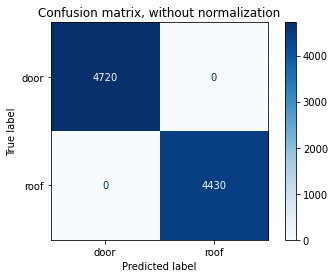

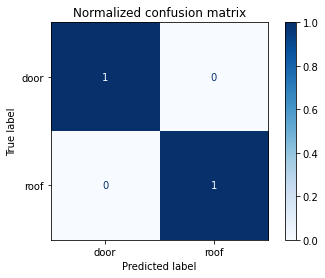

In [ ]:
#confusion matrices
np.set_printoptions(precision=2)
class_names = ['door','roof']
classifier = linear_model.LogisticRegression(C=10**0).fit(x_train,y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#reading door/roof csv mixed 
print(x1)
yhat_building02 = logreg.predict(x1)
print(yhat_building02)
print(np.unique(yhat_building02))
accuracy_b02 = accuracy_score(y1, yhat_building02)
print("Accuracy for Data:",accuracy_b02)

[[315714.5031 234789.8271 17.40099907 ... 392193.224 40 4]
 [315714.5909 234789.9209 17.34700012 ... 392193.2241 183 4]
 [315714.698 234790.0371 17.36100006 ... 392193.2241 42 4]
 ...
 [315730.537 234790.8491 6.1420002 ... 394844.7917 181 4]
 [315729.588 234792.083 7.08599997 ... 395108.2966 11 4]
 [315729.582 234792.1299 7.62400007 ... 395108.2966 17 4]]
['roof' 'roof' 'roof' ... 'roof' 'roof' 'roof']
['roof']
Accuracy for Data: 0.9873404710920771


In [ ]:

#Reading Door CSV File 
colsRemove= ['R','B','G']
df_b = pd.read_csv('building_02_doors_combined_234500_NW.csv',sep = ',',header = 0,names = ['X','Y','Z','R','B','G','Point_Source_ID','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification','Type']).drop(colsRemove, axis='columns')
df_b1 = df_b.dropna() 
df_b2 = df_b1.values
print(df_b2.shape)
x2 = df_b2[:, :12]
y2 = df_b2[:, 12] 
print(x2)
yhat_building03 = logreg.predict(x2)
#print(yhat_building03)
print(np.unique(yhat_building03))
accuracy_b03 = accuracy_score(y2, yhat_building03)
print("Accuracy for Data:",accuracy_b03)


(739, 13)
[[315718.655 234793.021 7.99700022 ... 392193.1866 135 4]
 [315718.719 234793.0811 7.78999996 ... 392193.1866 140 4]
 [315718.812 234793.1812 7.75899982 ... 392193.1867 51 4]
 ...
 [315730.537 234790.8491 6.1420002 ... 394844.7917 181 4]
 [315729.588 234792.083 7.08599997 ... 395108.2966 11 4]
 [315729.582 234792.1299 7.62400007 ... 395108.2966 17 4]]
['roof']
Accuracy for Data: 0.0


In [ ]:
'''
#Logistic Regression 
logreg = linear_model.LogisticRegression(C=10**8) #using a large c value = no regularization
logreg.fit(x_train, y_train)
yhat_train = logreg.predict(x_train)
#print(yhat_train)

#finding accuracy of applying model on training data
accuracy_train = accuracy_score(y_train, yhat_train)
print("Accuracy on train set:",accuracy_train)

#finding accuracy of applying model on test data 
yhat_test = logreg.predict(x_test)
#print(yhat_test)
accuracy_test = accuracy_score(y_test, yhat_test)
print("Accuracy on test set:",accuracy_test)
'''

'\n#Logistic Regression \nlogreg = linear_model.LogisticRegression(C=10**8) #using a large c value = no regularization\nlogreg.fit(x_train, y_train)\nyhat_train = logreg.predict(x_train)\n#print(yhat_train)\n\n#finding accuracy of applying model on training data\naccuracy_train = accuracy_score(y_train, yhat_train)\nprint("Accuracy on train set:",accuracy_train)\n\n#finding accuracy of applying model on test data \nyhat_test = logreg.predict(x_test)\n#print(yhat_test)\naccuracy_test = accuracy_score(y_test, yhat_test)\nprint("Accuracy on test set:",accuracy_test)\n'

In [ ]:
'''
#finding accuracy of applying model to a different building 
yhat_building_000001 = logreg.predict(x1)
print(yhat_building_000001)
accuracy_building_000001 = accuracy_score(y1, yhat_building_000001)
print("Accuracy on a different building (01):",accuracy_building_000001)
'''

'\n#finding accuracy of applying model to a different building \nyhat_building_000001 = logreg.predict(x1)\nprint(yhat_building_000001)\naccuracy_building_000001 = accuracy_score(y1, yhat_building_000001)\nprint("Accuracy on a different building (01):",accuracy_building_000001)\n'

In [ ]:
#Model Parameters (w/o Regularization)
w = logreg.coef_ 
intercept = logreg.intercept_

precision, recall ,fscore,_ = precision_recall_fscore_support(y_train,yhat_train,average='binary',pos_label='roof')
print("Coefficient:",w)
print("Intercept:",intercept)
print("Precision:",precision)
print("Recall:",recall)
print("Fscore:",fscore)


Coefficient: [[ 0.08  0.47  0.52  0.03 -0.29  0.    0.   -0.18 -0.17  0.05  0.14 -0.21]]
Intercept: [-0.07]
Precision: 1.0
Recall: 0.9970113568439928
Fscore: 0.9985034420832086


Confusion matrix, without normalization
[[    0   739]
 [    0 57636]]
Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


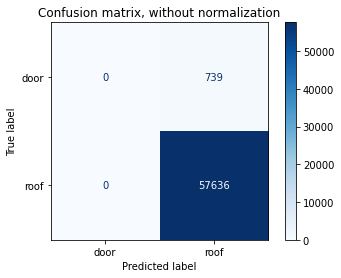

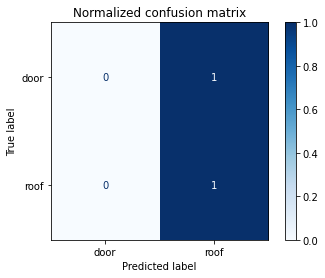

In [ ]:
#confusion matrices
np.set_printoptions(precision=2)
class_names = ['door','roof']
classifier = linear_model.LogisticRegression(C=10**-5).fit(x_train,y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x1, y1,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=22ec9222-3a33-4967-8b6b-eec8dcc0f029' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>